In [11]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [12]:
class Bandit:
    def __init__(self, mu: float, std: float):
        self._mu = mu
        self._std = std
        self._Q_est = 0
        self._N = 0

    def pull(self):
        return np.random.normal(loc=self._mu, scale=self._std)

    def update(self, r: float):
        self._N += 1
        alpha = 1 / self._N
        self._Q_est += (r - self._Q_est) * alpha

    @property
    def true_val(self):
        return self._mu

    @property
    def Q(self):
        return self._Q_est

In [13]:
def single_run(
    bandits: List[Bandit], n_steps: int, eps: float
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a single run of the bandit pull experiment
    """

    rewards = np.zeros(n_steps)
    optimal = np.zeros(n_steps)

    best_bandit = np.argmax([b.true_val for b in bandits])

    for i in range(n_steps):
        if np.random.rand() < eps:
            bandit = np.random.choice(np.arange(len(bandits)))

        else:
            bandit = np.argmax([b.Q for b in bandits])

        reward = bandits[int(bandit)].pull()
        bandits[int(bandit)].update(reward)
        rewards[i] = reward
        optimal[i] = 1 if bandit == best_bandit else 0

    return rewards, optimal

In [14]:
def run_experiment(
    means: np.ndarray, sigmas: np.ndarray, n_runs: int, n_steps: int, eps: float
) -> Tuple[np.ndarray, np.ndarray]:

    all_rewards = np.zeros((n_runs, n_steps))
    all_optimals = np.zeros((n_runs, n_steps))

    for run in range(n_runs):
        bandits = [Bandit(mu, sigma) for mu, sigma in zip(means, sigmas)]
        rewards, optimal = single_run(bandits=bandits, n_steps=n_steps, eps=eps)
        all_rewards[run] = rewards
        all_optimals[run] = optimal

    return all_rewards.mean(axis=0), all_optimals.mean(axis=0)

In [17]:
EPS = [0.01, 0.1]
N_STEPS = 5000
N_RUNS = 2000

MEANs = np.random.randn(10)
SIGMAs = np.random.rand(10)

EPS:  0.010
EPS:  0.100


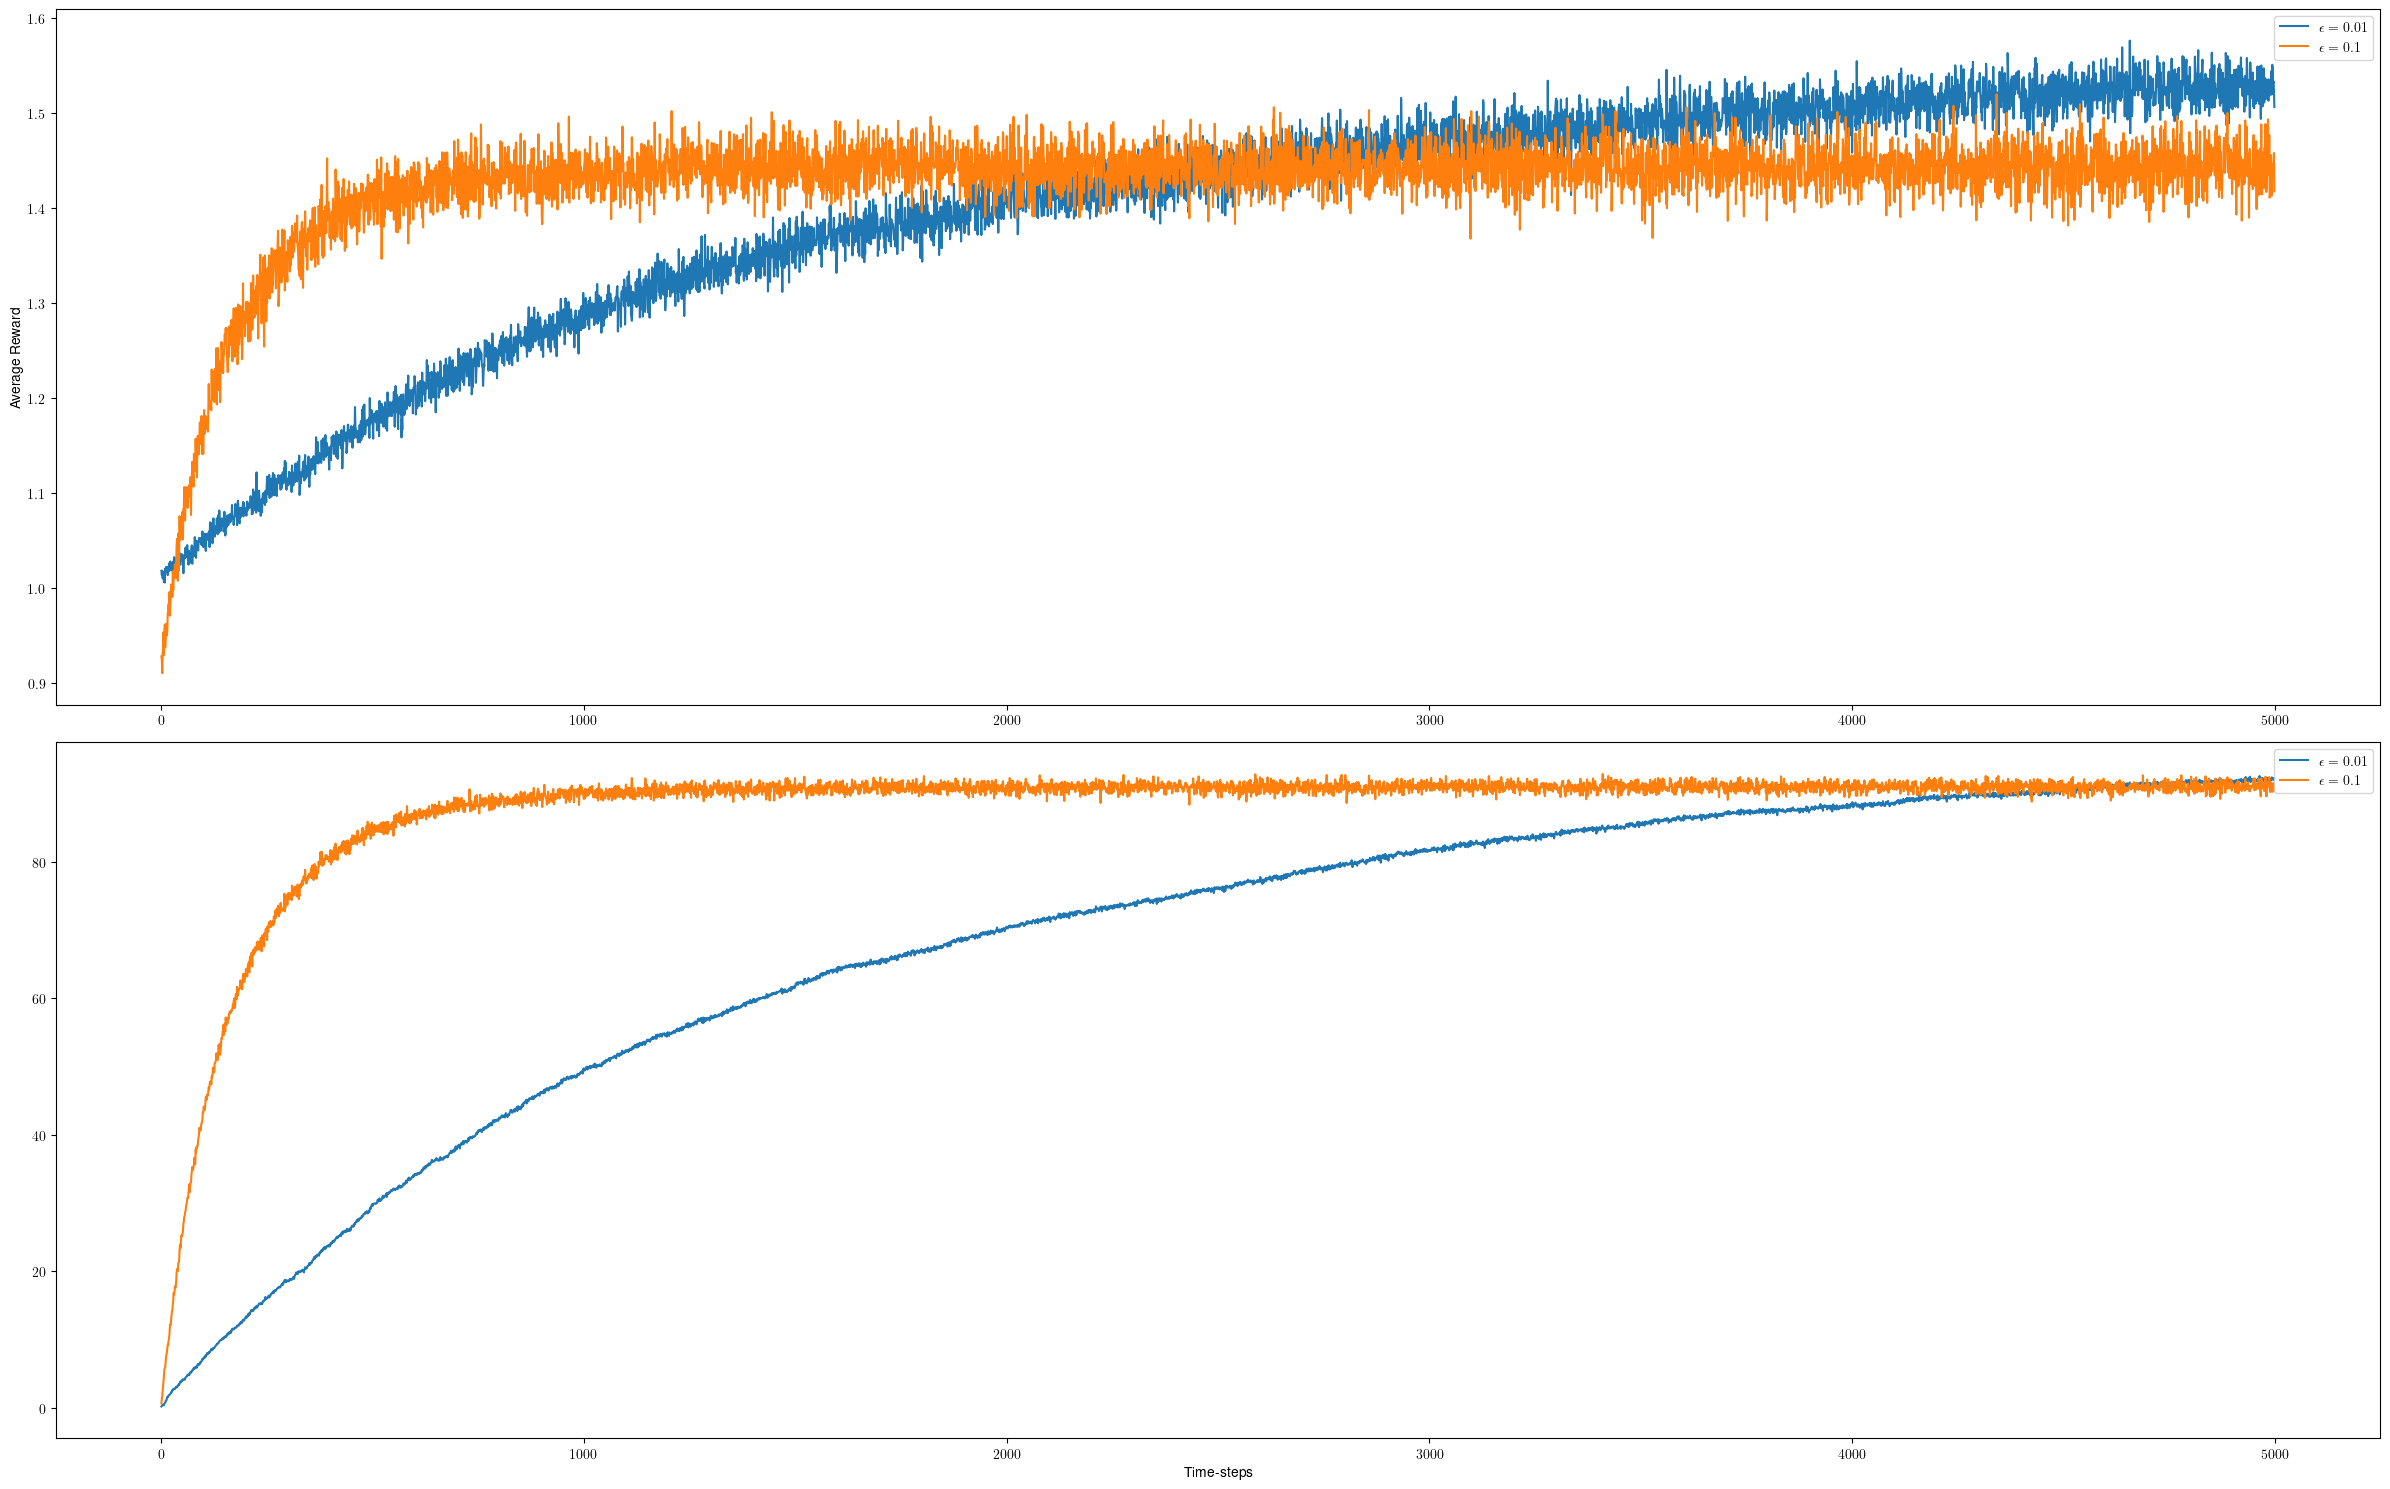

In [18]:
plt.figure(figsize=(24, 15))
plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})

for eps in EPS:
    print(f"EPS: {eps: .3f}")
    avg_r, avg_o = run_experiment(
        means=MEANs, sigmas=SIGMAs, n_runs=N_RUNS, n_steps=N_STEPS, eps=eps
    )
    plt.subplot(2, 1, 1)
    plt.plot(avg_r, label=rf"$\epsilon={eps}$")
    plt.ylabel("Average Reward")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(avg_o * 100, label=rf"$\epsilon={eps}$")
    plt.ylabel("% Optimal action")
    plt.xlabel("Time-steps")
    plt.legend()

plt.tight_layout()
plt.show()